# Analysis
## 1 - What indicators can be used to measure the efficiency of procurement by each of the partners? Which partners are the best, the worst according to these indicators?
We can use registrations, users_acqusition_costs, revenue_7_days to measure the efficiency.
According to plot Partner 4 has the highest revenue but his profit is the worst. This means he spent too much many on acquiring customers and should evaluate his methods for future improvments. Partner's 1 and Partner's 2 revenue is second highest and their profits look good. This means that they found an efficienct way to acquire customers. Other partners did not spend much and did not acquire much. This means that they have some room for improvment.

## 2 - Is there a relationship between the procurement period and its effectiveness for each of the partners? Are there other factors that influence procurement efficiency?
Registration period matters most for Partners 4 and 2, they do not seem to affect others. Partner 4 excels in summer and Partner 2 at the end of the year.

## 3 - Which audience is the most targeted for the company? Provide recommendations to partners on which audience they should purchase
According to plot partners should be most interested in age group 55+ but should not forget about group 35-55. They should also be interested in people who login from mobile devices such as IPhone or Android. According to plots Partner 4 is the most efficient at keeping customers, Partner 6 is the most efficient at acquiring customers, Partner 4 has the highest revenue. Overall Partner 4 looks like the most efficient.

## 4 - How should new marketing budgets be allocated between traffic sources and partners?
The most efficient traffic type is Google Search but Facebook is not far behind. Parner 1 has the highest total revenue, others' are nearly two times less or worse. Based on the previous analysis Partner 1 with his Google Search engine did good but he can improve his methods of acquiring customers by analysing the target audience more. Partner 4 is good at acquiring customers but spends too much money. In my opinion Partner 1 and 4 might benefit from exchanging their strategies and acquiring new knowledge from each other if possible. Google Media traffic type does not seem to be efficient and should probably be dropped unless some radical change is made. In conclusion, budget should be the highest for Google Search's Partner 1 and Facebook's Partner 4.


# Import relevant modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Import data

In [3]:
df = pd.read_csv('marketing_data-28347077.csv')
df.head()

,registration_date,traffic_type,id_partner,age_group,device,country_tier,registrations,users_acqusition_costs,revenue_7_days,logins_1_lt,logins_3_lt,logins_7_lt
0,2021-06-24,Google Search,1,35-,iOS,Tier_1,60,220.0,2.99,5,3,1
1,2021-09-13,Google Search,1,35-,MacOS,Tier_1,8,0.0,0.00,0,0,0
2,2021-07-12,Google Search,1,35-55,Android,Tier_1,121,2550.0,225.97,28,19,11
3,2021-03-26,Google Search,1,35-55,iOS,Tier_1,95,1900.0,351.92,23,9,2
4,2021-04-26,Google Search,1,35-,Android,Tier_1,51,915.0,256.09,7,2,2


# Data preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   registration_date       48248 non-null  object 
 1   traffic_type            48248 non-null  object 
 2   id_partner              48248 non-null  int64  
 3   age_group               48246 non-null  object 
 4   device                  48248 non-null  object 
 5   country_tier            48248 non-null  object 
 6   registrations           48248 non-null  int64  
 7   users_acqusition_costs  48248 non-null  float64
 8   revenue_7_days          48248 non-null  float64
 9   logins_1_lt             48248 non-null  int64  
 10  logins_3_lt             48248 non-null  int64  
 11  logins_7_lt             48248 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.4+ MB


## Data cleaning

### Check missing values

In [5]:
df.isnull().values.any()

True

In [6]:
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum() 

print(f'Missing : {total_missing}')

Missing : 2


Lets find out where the missing values are.

In [7]:
columns_with_missing = df.isna().any()

columns_with_missing

registration_date         False
traffic_type              False
id_partner                False
age_group                  True
device                    False
country_tier              False
registrations             False
users_acqusition_costs    False
revenue_7_days            False
logins_1_lt               False
logins_3_lt               False
logins_7_lt               False
dtype: bool

### Handle missing values
Since there are only 2 missing values out of 48248 it's safe to delete entries with them.

In [8]:
df = df.dropna(subset=['age_group'])
df.isnull().values.any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48246 entries, 0 to 48247
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   registration_date       48246 non-null  object 
 1   traffic_type            48246 non-null  object 
 2   id_partner              48246 non-null  int64  
 3   age_group               48246 non-null  object 
 4   device                  48246 non-null  object 
 5   country_tier            48246 non-null  object 
 6   registrations           48246 non-null  int64  
 7   users_acqusition_costs  48246 non-null  float64
 8   revenue_7_days          48246 non-null  float64
 9   logins_1_lt             48246 non-null  int64  
 10  logins_3_lt             48246 non-null  int64  
 11  logins_7_lt             48246 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.8+ MB


# Data visualization and exploration

## Calculate the metrics by partner

In [25]:

partner_metrics = df.groupby('id_partner').agg({
    'registrations': 'sum',
    'users_acqusition_costs': 'sum',
    'revenue_7_days': 'sum',
    'logins_1_lt': 'sum',
    'logins_3_lt': 'sum',
    'logins_7_lt': 'sum'
})

partners_sorted_by_revenue = partner_metrics.sort_values('revenue_7_days', ascending=False)
partners_sorted_by_revenue


,registrations,users_acqusition_costs,revenue_7_days,logins_1_lt,logins_3_lt,logins_7_lt
id_partner,,,,,,
1,217271,5.205538e+06,1341136.700,43683,26299,17502
3,310841,4.246830e+06,870313.005,51691,31840,21103
4,431526,5.982619e+06,788895.900,70264,43043,28643
2,161962,4.877357e+06,525264.020,28294,16693,10847
6,837235,2.316403e+06,302755.920,103326,53881,32258
5,749426,1.989380e+06,170339.740,81951,41714,24342


### Revenue plot for partners

<Axes: xlabel='id_partner', ylabel='revenue_7_days'>

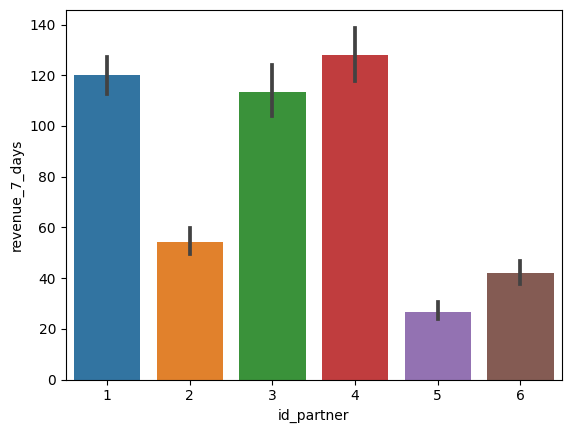

In [27]:
sns.barplot(data=df, x="id_partner", y="revenue_7_days")

In [31]:
partner_metrics['profit'] = partner_metrics['revenue_7_days'] - partner_metrics['users_acqusition_costs']
partners_sorted_by_profit = partner_metrics.sort_values('profit', ascending=False)
partners_sorted_by_profit


,registrations,users_acqusition_costs,revenue_7_days,logins_1_lt,logins_3_lt,logins_7_lt,profit
id_partner,,,,,,,
5,749426,1.989380e+06,170339.740,81951,41714,24342,-1.819040e+06
6,837235,2.316403e+06,302755.920,103326,53881,32258,-2.013647e+06
3,310841,4.246830e+06,870313.005,51691,31840,21103,-3.376517e+06
1,217271,5.205538e+06,1341136.700,43683,26299,17502,-3.864401e+06
2,161962,4.877357e+06,525264.020,28294,16693,10847,-4.352093e+06
4,431526,5.982619e+06,788895.900,70264,43043,28643,-5.193723e+06


### Profit plot for partners

<Axes: xlabel='id_partner', ylabel='profit'>

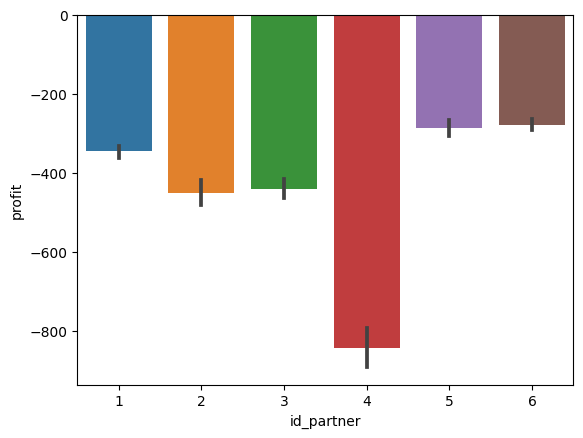

In [32]:
sns.barplot(data=df, x="id_partner", y="profit")

## Relationship between the procurement period and its effectiveness

In [60]:
df['registration_date'] = pd.to_datetime(df['registration_date'])
metrics = df.groupby(['id_partner', 'registration_date']).agg({
    'users_acqusition_costs': 'mean',
    'revenue_7_days': 'mean'
})
metrics

users_acqusition_costs  revenue_7_days
id_partner registration_date                                        
1          2021-01-01                     762.857143      171.884286
           2021-01-02                     770.125000      129.875250
           2021-01-03                     669.242424      130.403333
           2021-01-04                     551.764706       79.952647
           2021-01-05                     464.750000       46.453000
...                                              ...             ...
6          2021-11-13                     131.642857       35.760952
           2021-11-14                     117.443182        7.512273
           2021-11-15                     123.027826      196.434348
           2021-11-16                     103.760870       39.246087
           2021-11-17                     106.283810        0.142381

[1927 rows x 2 columns]

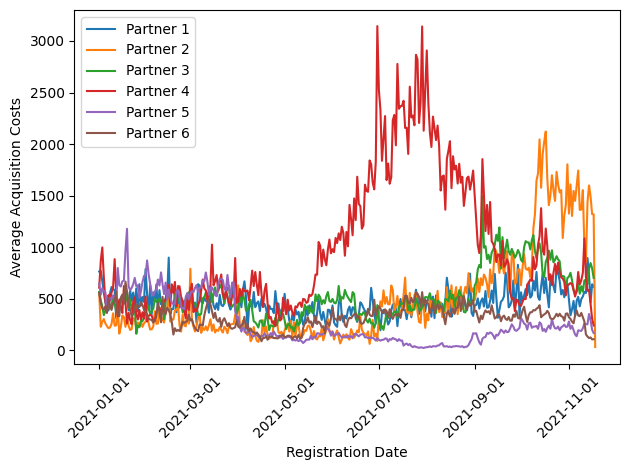

In [61]:
fig, ax = plt.subplots()

for partner in metrics.index.get_level_values('id_partner').unique():
    partner_data = metrics.loc[partner]
    ax.plot(partner_data.index, partner_data['users_acqusition_costs'], label=f"Partner {partner}")
    
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

xticks = ax.get_xticks()
ax.set_xticks(xticks[::2])  

plt.xlabel("Registration Date")
plt.ylabel("Average Acquisition Costs")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Target audience

In [40]:
revenue_by_partner = df.groupby('id_partner')['revenue_7_days'].mean().sort_values(ascending=False)

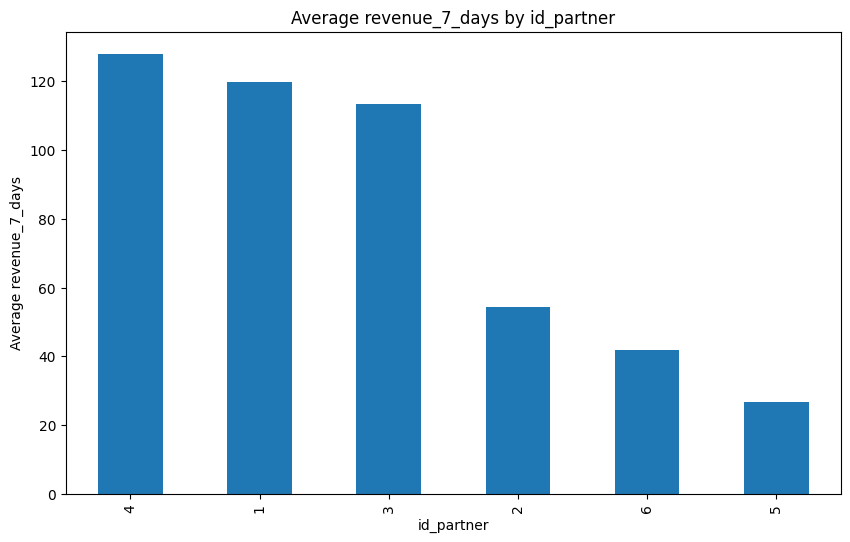

In [41]:
plt.figure(figsize=(10, 6))
revenue_by_partner.plot(kind='bar')
plt.title('Average revenue_7_days by id_partner')
plt.xlabel('id_partner')
plt.ylabel('Average revenue_7_days')
plt.show()

In [42]:
registrations_by_partner = df.groupby('id_partner')['registrations'].sum().sort_values(ascending=False)

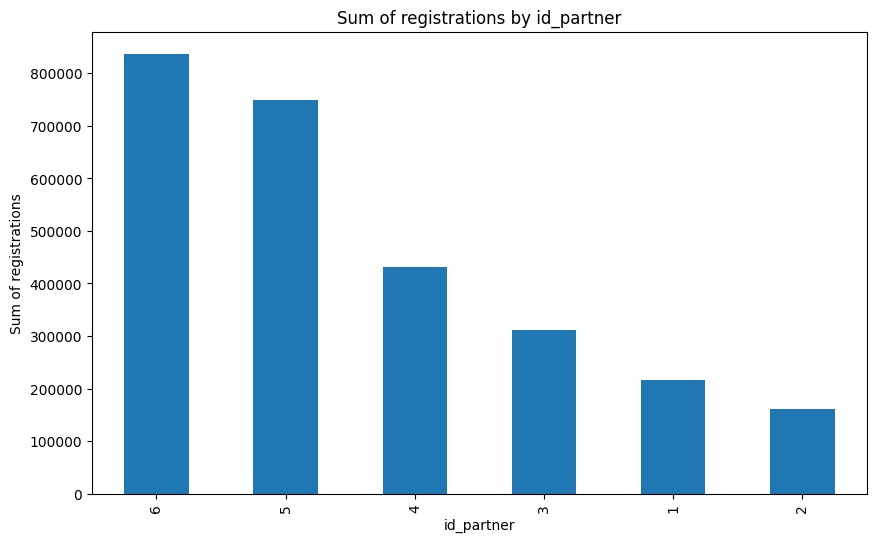

In [43]:
plt.figure(figsize=(10, 6))
registrations_by_partner.plot(kind='bar')
plt.title('Sum of registrations by id_partner')
plt.xlabel('id_partner')
plt.ylabel('Sum of registrations')
plt.show()

In [44]:
logins_by_partner = df.groupby('id_partner')['logins_7_lt'].mean().sort_values(ascending=False)

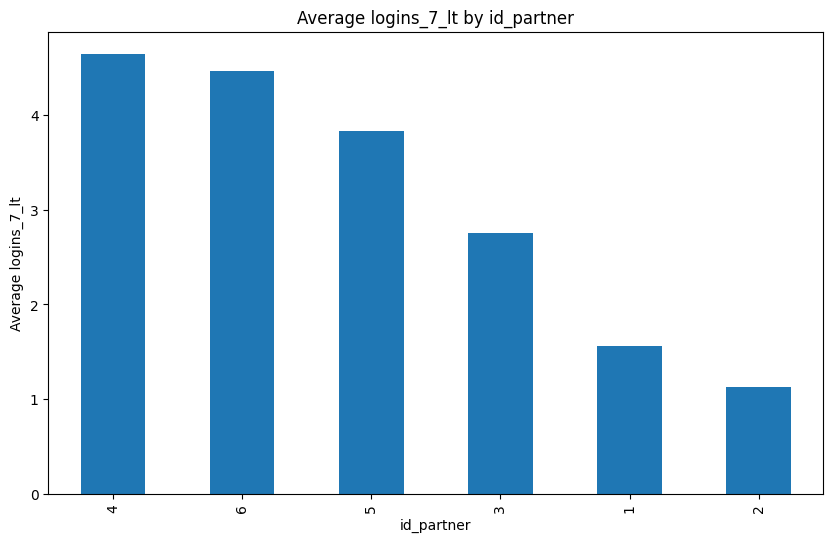

In [45]:
plt.figure(figsize=(10, 6))
logins_by_partner.plot(kind='bar')
plt.title('Average logins_7_lt by id_partner')
plt.xlabel('id_partner')
plt.ylabel('Average logins_7_lt')
plt.show()


### Category plots

<Axes: xlabel='id_partner', ylabel='revenue_7_days'>

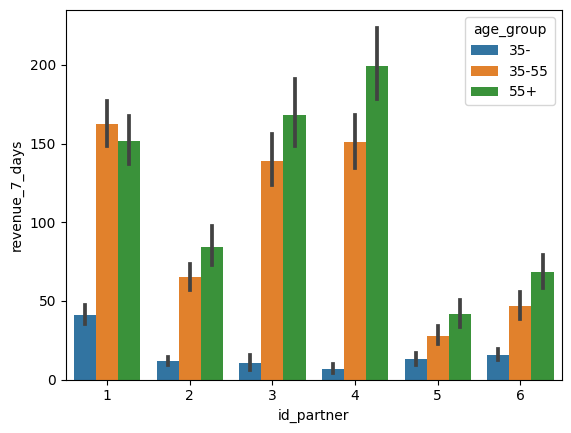

In [46]:
sns.barplot(data=df, x="id_partner", y="revenue_7_days", hue="age_group")

<Axes: xlabel='id_partner', ylabel='revenue_7_days'>

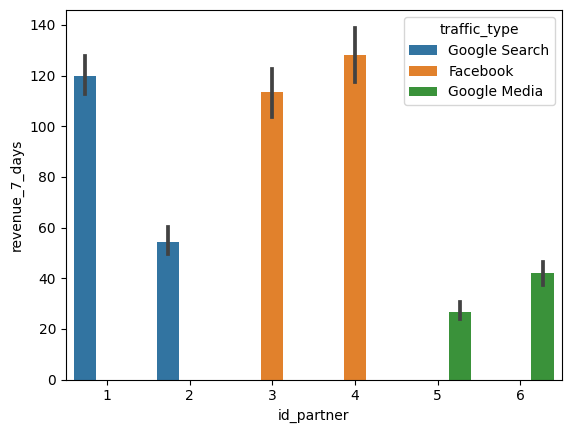

In [47]:
sns.barplot(data=df, x="id_partner", y="revenue_7_days", hue="traffic_type")

<Axes: xlabel='id_partner', ylabel='revenue_7_days'>

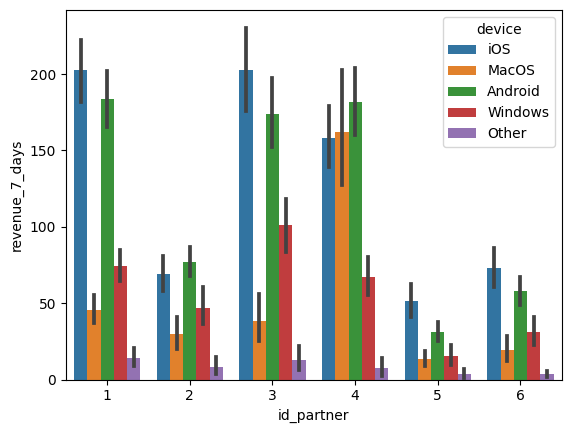

In [48]:
sns.barplot(data=df, x="id_partner", y="revenue_7_days", hue="device")

## Traffic and revenue

In [49]:
revenue_by_traffic = df.groupby('traffic_type')['revenue_7_days'].sum().sort_values(ascending=False)

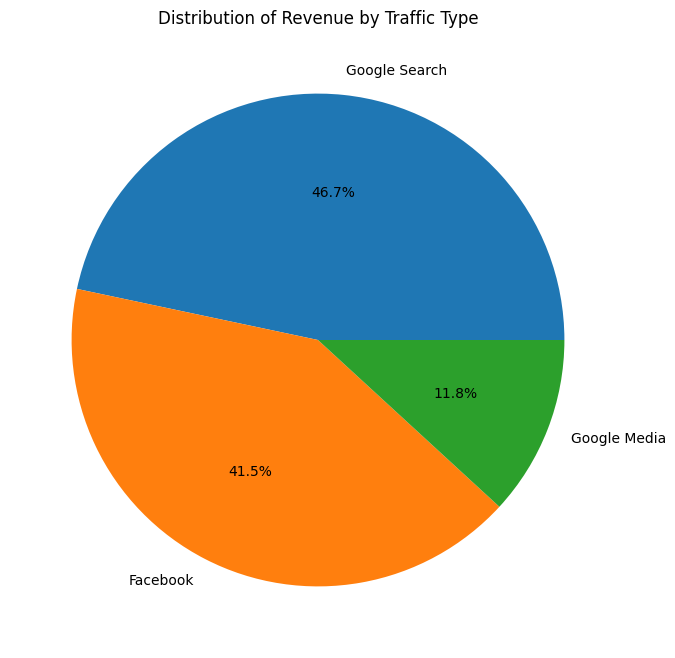

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_traffic, labels=revenue_by_traffic.index, autopct='%1.1f%%')
plt.title('Distribution of Revenue by Traffic Type')
plt.show()

In [51]:
revenue_by_partner = df.groupby('id_partner')['revenue_7_days'].sum().sort_values(ascending=False)

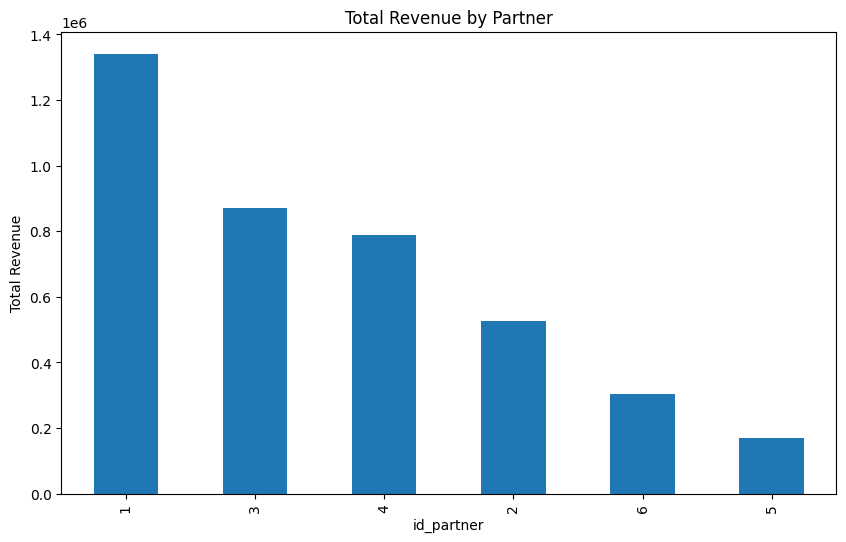

In [52]:
plt.figure(figsize=(10, 6))
revenue_by_partner.plot(kind='bar')
plt.title('Total Revenue by Partner')
plt.xlabel('id_partner')
plt.ylabel('Total Revenue')
plt.show()

## Other

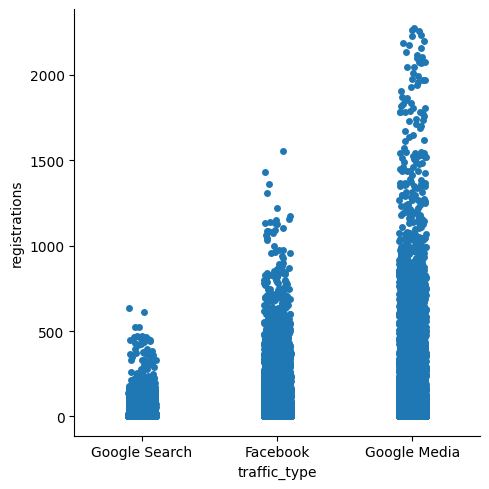

In [ ]:
sns.catplot(data=df, y="registrations", x="traffic_type")

<Axes: xlabel='age_group', ylabel='count'>

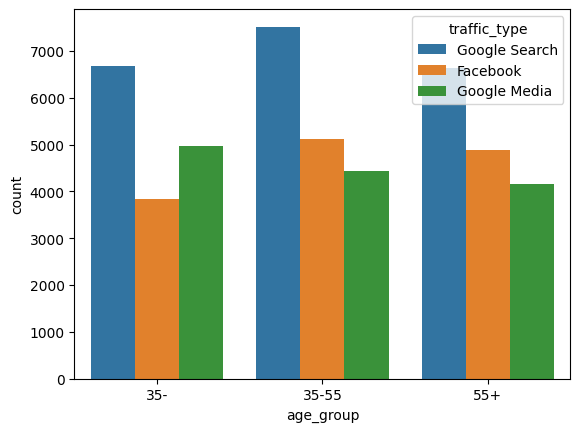

In [ ]:
sns.countplot(data=df, x="age_group", hue="traffic_type")

<Axes: xlabel='device', ylabel='count'>

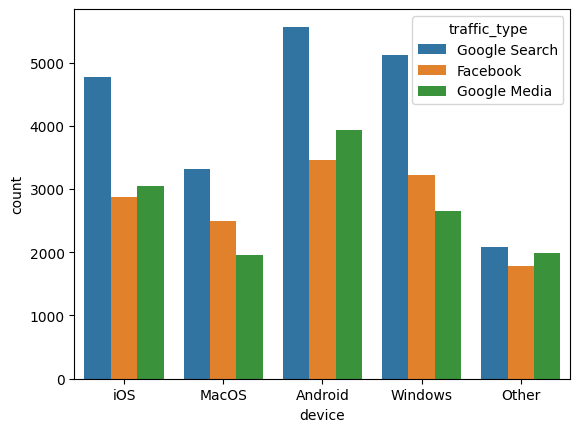

In [ ]:
sns.countplot(data=df, x="device", hue="traffic_type")

<Axes: xlabel='traffic_type', ylabel='registrations'>

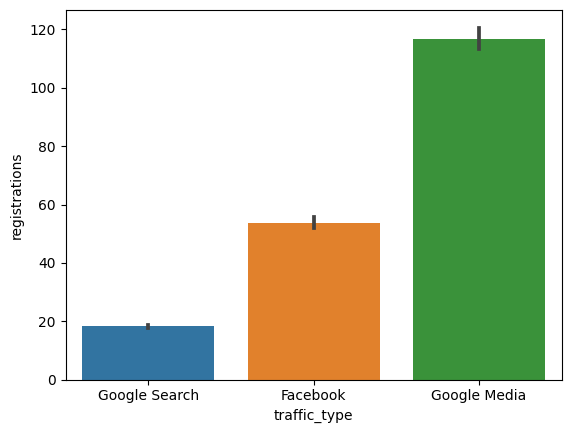

In [ ]:
sns.barplot(data=df, y="registrations", x="traffic_type")

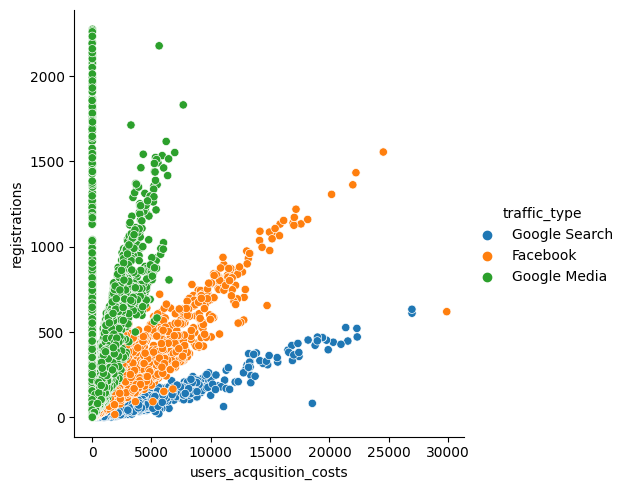

In [ ]:
sns.relplot(data=df, y="registrations", x="users_acqusition_costs", hue="traffic_type")

<Axes: xlabel='id_partner', ylabel='users_acqusition_costs'>

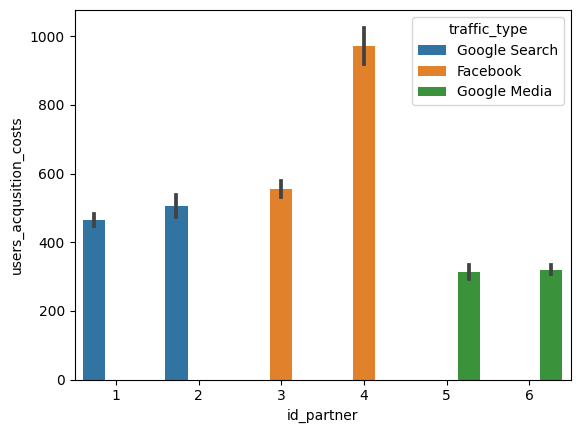

In [ ]:
sns.barplot(data=df, x="id_partner", y="users_acqusition_costs", hue="traffic_type")

<Axes: xlabel='id_partner', ylabel='users_acqusition_costs'>

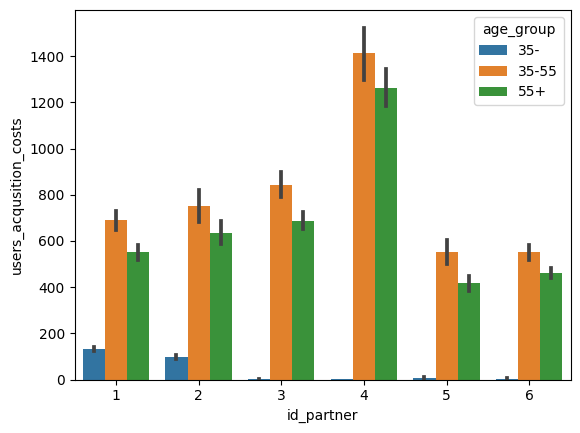

In [ ]:
sns.barplot(data=df, x="id_partner", y="users_acqusition_costs", hue="age_group")

<Axes: xlabel='id_partner', ylabel='users_acqusition_costs'>

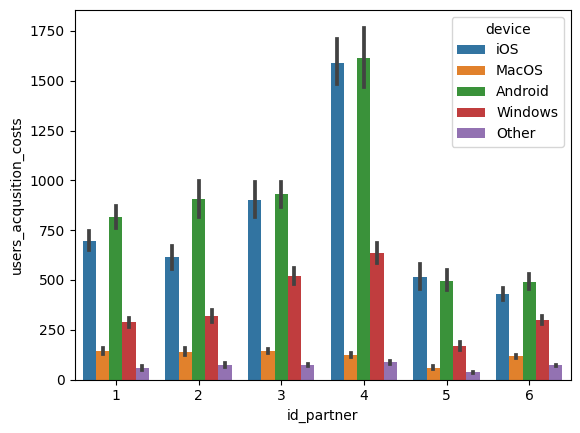

In [ ]:
sns.barplot(data=df, x="id_partner", y="users_acqusition_costs", hue="device")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48246 entries, 0 to 48247
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   registration_date       48246 non-null  object 
 1   traffic_type            48246 non-null  object 
 2   id_partner              48246 non-null  int64  
 3   age_group               48246 non-null  object 
 4   device                  48246 non-null  object 
 5   country_tier            48246 non-null  object 
 6   registrations           48246 non-null  int64  
 7   users_acqusition_costs  48246 non-null  float64
 8   revenue_7_days          48246 non-null  float64
 9   logins_1_lt             48246 non-null  int64  
 10  logins_3_lt             48246 non-null  int64  
 11  logins_7_lt             48246 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 5.8+ MB
